# Import the necessary libraries


In [570]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



## Loading in the data

Here we will load the datasets that we will be working with

In [571]:
df_test_features = pd.read_csv('data/test_set_features.csv')
df_training_features = pd.read_csv('data/training_set_features.csv')
df_training_labels = pd.read_csv('data/training_set_labels.csv')

## Data Exploration

Here we will explore the structure of the datasets and look at the distributions before we begin the analysis.
We will first begin with the summary statistics within the data
We will first start with:
 - The training data then
 - the test data then
 - look at the labels

### Main features within the datasets:
The first column respondent_id is a unique and random identifier
For all binary variables: 0 = No; 1 = Yes.

 - h1n1_concern - _Level of concern about the H1N1 flu._
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
_0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge._
- behavioral_antiviral_meds - _Has taken antiviral medications. (binary)_
- behavioral_avoidance - _Has avoided close contact with others with flu-like symptoms. (binary)_
- behavioral_face_mask - _Has bought a face mask. (binary)_
- behavioral_wash_hands - _Has frequently washed hands or used hand sanitizer. (binary)_
- behavioral_large_gatherings - _Has reduced time at large gatherings. (binary)_
- behavioral_outside_home - _Has reduced contact with people outside of own household. (binary)_
- behavioral_touch_face - _Has avoided touching eyes, nose, or mouth. (binary)_
- doctor_recc_h1n1 - _H1N1 flu vaccine was recommended by doctor. (binary)_
- doctor_recc_seasonal - _Seasonal flu vaccine was recommended by doctor. (binary)_
- chronic_med_condition - _Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)_
- child_under_6_months - _Has regular close contact with a child under the age of six months. (binary)_
- health_worker - _Is a healthcare worker. (binary)_
- health_insurance - _Has health insurance. (binary)_
- opinion_h1n1_vacc_effective - _Respondent's opinion about H1N1 vaccine effectiveness._
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - _Respondent's opinion about risk of getting sick with H1N1 flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - _Respondent's worry of getting sick from taking H1N1 vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - _Respondent's opinion about seasonal flu vaccine effectiveness_.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk -_Respondent's opinion about risk of getting sick with seasonal flu without vaccine._
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - _Respondent's worry of getting sick from taking seasonal flu vaccine._
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - _Age group of respondent._
- education - _Self-reported education level._
- race - _Race of respondent._
- sex - _Sex of respondent._
- income_poverty - _Household annual income of respondent with respect to 2008 Census poverty thresholds._
- marital_status - _Marital status of respondent._
- rent_or_own - _Housing situation of respondent._
- employment_status - _Employment status of respondent._
- hhs_geo_region - _Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings._
- census_msa - _Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census._
- household_adults - _Number of other adults in household, top-coded to 3._
- household_children - _Number of children in household, top-coded to 3._
- employment_industry - _Type of industry respondent is employed in. Values are represented as short random character strings._
- employment_occupation - _Type of occupation of respondent. Values are represented as short random character strings._

1. Training dataset

In [572]:
# 1. For our train dataset
# Here we are looking at the column dtypes and the number of elements within the columns
print(df_training_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_training_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
print("There seems to be some missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [573]:
def col_data(data):
    """This function takes in a dataframe and returns infomation about it"""
    info = print(f"""The following columns are of type numeric: \n
                 -----------------------------
                 | These are the column names|
        --------------------------------------
        {data.select_dtypes('number').columns} \n
        -------------------------------
        a total of {data.select_dtypes('number').columns.shape} columns
        ----------------------
    These other remaining columns are non-numeric \n
    --------------------------
    | These are the column names|
    -----------------------------
    {data.select_dtypes('object').columns}\n
    ----------------------------
    a total of {data.select_dtypes('object').columns.shape} columns
    """)
    return info

In [574]:
print("We will use the function we created above to get infomation about the training dataset")
col_data(df_training_features)

We will use the function we created above to get infomation about the training dataset
The following columns are of type numeric: 

                 -----------------------------
                 | These are the column names|
        --------------------------------------
        Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object') 

        -------------------------------
        a 

Lets try and visualize the missing data for this data

### Train dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.


##### Lets try and visualize the missing data from our training dataset

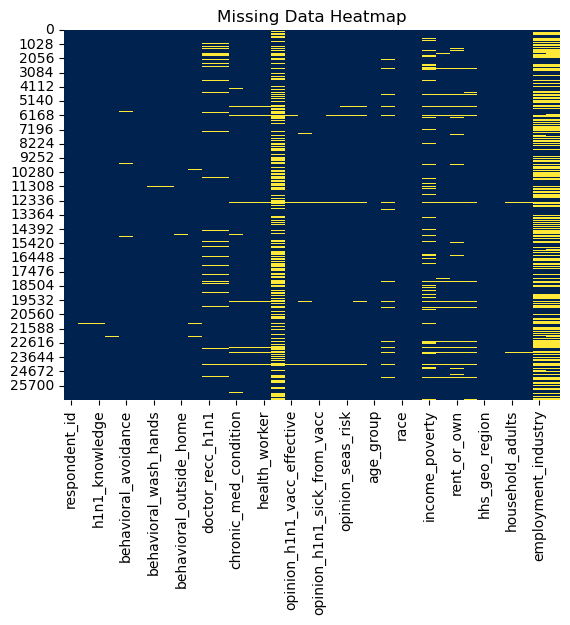

In [575]:
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### 2. Test Dataset

In [576]:
# 2. Test Dataset
# Here we are looking at the column dtypes and the number of elements within the columns

print(df_test_features.info())# Here we are looking at the column dtypes and the number of items within the columns
print(df_test_features.describe()) # Here we are attempting to look at the mean, min and max values of the columns
print("\n---------------------------\n")
print("It seems this portion of our data has 36 columns and a mixture of dtypes i.,e int, floats and object types")
col_data(df_test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

##### Lets try and visualize the missing data from our testing dataset

### Test dataset summary
- This dataset has 26707 unique Ids representing the individual respondents
- The data has a 36 columns of a mixture of int, floats and object types
- 24 of the columns are numeric while 12 columns are non-numeric
- There are some columns with some missing values
- The all of the columns in this dataset apart from the respondent_id column seem to be either behavioural or demographics data.

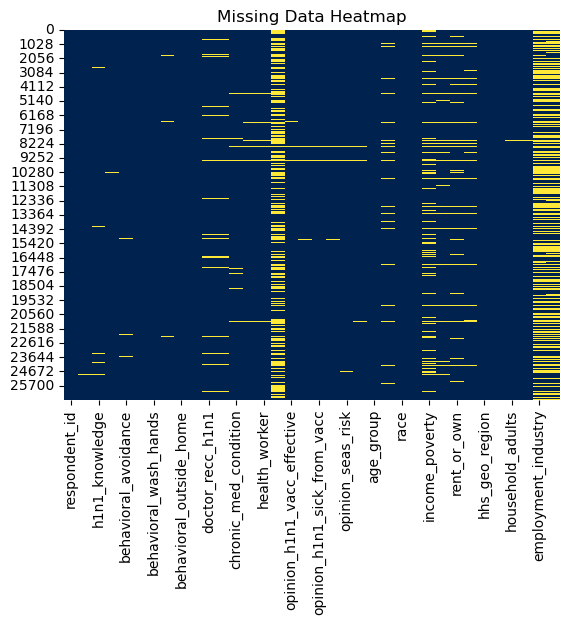

In [577]:
sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

3. For the Training Set_labels

In [578]:
print("The following are the summary of the columns:\n")
print(df_training_labels.info())
print("\n\nMissing values within the columns:\n\n{}".format(df_training_labels.isnull().sum()))

print("\nThe data for training labels also has 26707 entries with 3 columns of type int")


The following are the summary of the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB
None


Missing values within the columns:

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

The data for training labels also has 26707 entries with 3 columns of type int


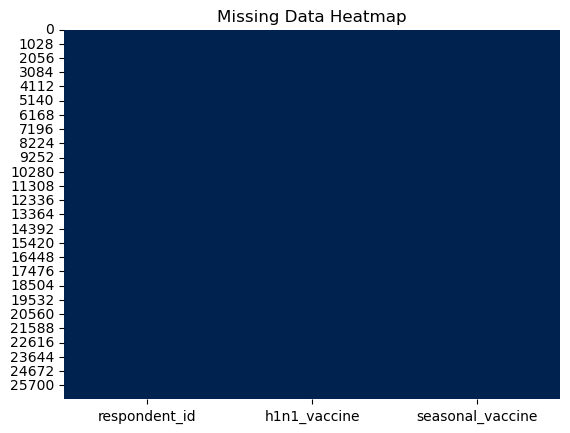

In [579]:
sns.heatmap(df_training_labels.isnull(), cbar=False, cmap='cividis')
plt.title('Missing Data Heatmap')
plt.show()

#### Training label summary
- This one has  26707 entries with 3 cols of type int
- The first column is the respondent id which contains the unique identifiers
- Then the H1N1 vaccine and the Seasonal vaccine columns
- This portion of the data has 0 missing values

#### Strategy for the missing values
- We will look at the sample distributions for each of the main data groups in our data and determine the best way for filling in the missing values

In [608]:
# Here we will categorize the columns with their data types

binary_cols = df_training_features.columns[3:16].tolist()

ordinal_cols = df_training_features.columns[[1,2,] + list(range(16,22))].tolist()

nominal_cols = df_training_features.columns[list(range(22,32)) + [-2,-1]].tolist()

numeric_cols = df_training_features.columns[list(range(32,34))].tolist()


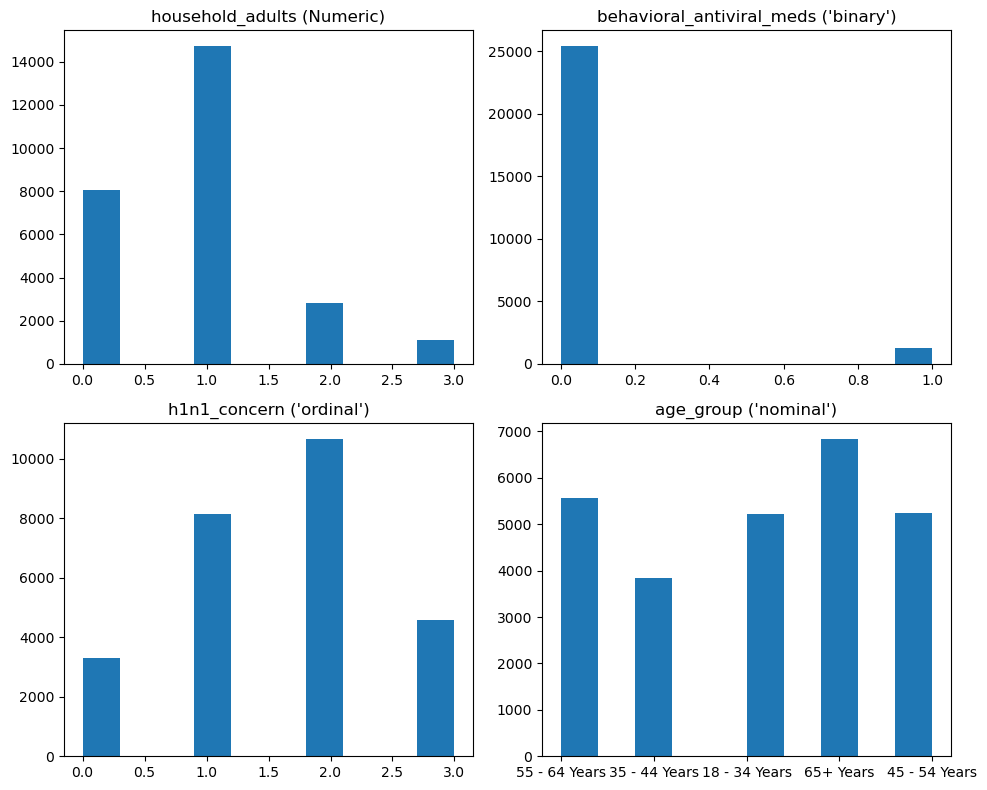

In [609]:
# Here we view the first columns and their distributions

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Accessing the first column from each Index
axes[0].hist(df_training_features[numeric_cols[0]])
axes[0].set_title(f"{numeric_cols[0]} (Numeric)")

axes[1].hist(df_training_features[binary_cols[0]])
axes[1].set_title(f"{binary_cols[0]} ('binary')")

axes[2].hist(df_training_features[ordinal_cols[0]])
axes[2].set_title(f"{ordinal_cols[0]} ('ordinal')")


axes[3].hist(df_training_features[nominal_cols[0]])
axes[3].set_title(f"{nominal_cols[0]} ('nominal')")

plt.tight_layout()
plt.show()



***The following is the strategy that we will use to deal with the missing values within the data***

| Data type| Action| Reason |
|---------|-------|--------|
| Binary | Fill using the mode | Because binary variables have only two categories (e.g., Yes/No). The mode is a logical choice that preserves the data's distribution. | 
| Ordinal | Fill using the mode| Because the values are categorical, they  have a natural order but not a numerical distance therefore using mode will enable us not make assumptions on the distances|
| Nominal | Fill using Missing | Because the values have no inherent order it is wise to label the data as unknown so that the model can still learn from it. |
| Numeric columns | Fill using the median| Because the data is continous and median is more robust to outliers |

We will then use the SimpleImputer class from sklearn to encode the missing values.


Note:
Our Numeric column has some non-numeric missing data which is labelled as missing. We need to convert this to a numeric type

In [616]:
def imputer(df):
    "This funcion takes in a dataframe and performs simple imputation"

    binary_imputer = SimpleImputer(strategy='most_frequent')
    df[binary_cols] = binary_imputer.fit_transform(df[binary_cols])
    ordinal_imputer = SimpleImputer(strategy='most_frequent')
    df[ordinal_cols] = ordinal_imputer.fit_transform(df[ordinal_cols])
    nominal_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
    df[nominal_cols] = nominal_imputer.fit_transform(df[nominal_cols])
    
    # Here we are converting the two numeric cols to a numeric type
    df['household_adults'] = df['household_adults'].replace('Missing', np.nan)
    df['household_children'] = df['household_children'].fillna('median')

    numeric_imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

    return df

In [617]:
# Call the imputer function on both the train and test datasets
df_train = imputer(df_training_features)
df_test = imputer(df_test_features)

Lets confirm that we have removed all the nulls in our training dataset

In [620]:
df_training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

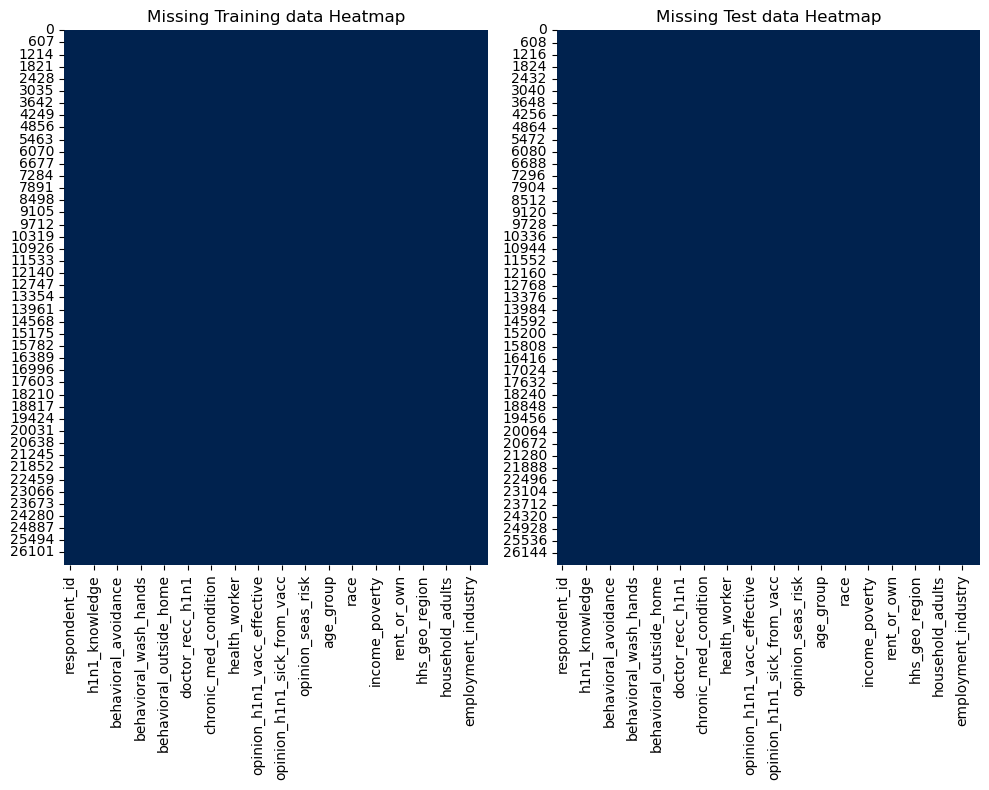

In [631]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
axes = axes.flatten()
sns.heatmap(df_training_features.isnull(), cbar=False, cmap='cividis', ax=axes[0])
axes[0].set_title('Missing Training data Heatmap')

sns.heatmap(df_test_features.isnull(), cbar=False, cmap='cividis', ax=axes[1])
axes[1].set_title('Missing Test data Heatmap')
plt.tight_layout()
plt.show()